In [1]:
from IPython.display import display, HTML, Image
display(HTML("<style>.container { width:95% !important; }</style>"))

%load_ext autoreload
%autoreload 2

import os
import numpy as np
import scanpy as sc

from matplotlib import cm
import matplotlib.pyplot as plt

import sys
sys.path.append("../../lib")
from stpalette import palette1
from utils import loadADs, scaleMH, concatADs
from plots import simpleCorrPlot, simpleCorrPlotAll

In [2]:
model = 'WM4007'

In [3]:
preprocessedDataPath = 'c:/Projects/A_ST/from HPCC 11 28 2022/results_NF1-nod-t2t-k35/%s/' % model
dataPath = '../../data/'

ids = sorted(np.loadtxt(dataPath + 'ids_%s_ST.txt' % model, dtype=str))
ids

['WM4007_T0_S1_ST',
 'WM4007_T0_S2_ST',
 'WM4007_T1_S1_ST',
 'WM4007_T1_S2_ST',
 'WM4007_T2_S1_ST',
 'WM4007_T2_S2_ST',
 'WM4007_T3_S1_ST',
 'WM4007_T3_S2_ST',
 'WM4007_T4_S1_ST',
 'WM4007_T4_S2_ST',
 'WM4007_TC_S1_ST',
 'WM4007_TC_S2_ST']

In [4]:
palette1.update({id: cm.terrain(0.01 + i/len(ids)) for i, id in enumerate(ids)})

# Load pre-processed samples

In [5]:
ads = loadADs(ids, preprocessedDataPath)

# Scale library sizes

Sample 	 Median (across spots) total mRNA, before scaling, human spots
WM4007_T0_S1_ST 	 30967.0
WM4007_T0_S2_ST 	 31210.0
WM4007_T1_S1_ST 	 27910.0
WM4007_T1_S2_ST 	 28700.0
WM4007_T2_S1_ST 	 20318.0
WM4007_T2_S2_ST 	 14094.0
WM4007_T3_S1_ST 	 25289.0
WM4007_T3_S2_ST 	 24304.0
WM4007_T4_S1_ST 	 26625.0
WM4007_T4_S2_ST 	 30744.0
WM4007_TC_S1_ST 	 26802.0
WM4007_TC_S2_ST 	 37152.0


C:\Users\domans\Anaconda3\lib\site-packages\anndata\_core\anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'clusters' as categorical
C:\Users\domans\Anaconda3\lib\site-packages\anndata\_core\anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'clusters_consensus' as categorical
C:\Users\domans\Anaconda3\lib\site-packages\anndata\_core\anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will

{'WM4007_T0_S1_ST': 33862.000886917114,
 'WM4007_T0_S2_ST': 31991.00055027008,
 'WM4007_T1_S1_ST': 34066.00046777725,
 'WM4007_T1_S2_ST': 32497.000190258026,
 'WM4007_T2_S1_ST': 34120.00051832199,
 'WM4007_T2_S2_ST': 33976.000334739685,
 'WM4007_T3_S1_ST': 33695.000190258026,
 'WM4007_T3_S2_ST': 31275.00058078766,
 'WM4007_T4_S1_ST': 33309.00053405762,
 'WM4007_T4_S2_ST': 31658.000463962555,
 'WM4007_TC_S1_ST': 34210.00073432922,
 'WM4007_TC_S2_ST': 34193.000081539154}

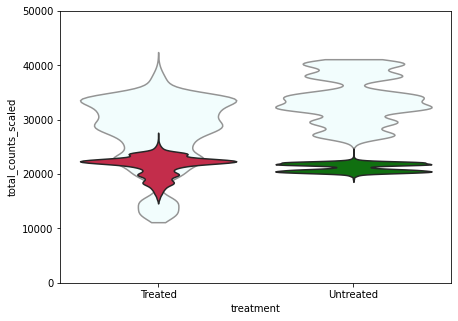

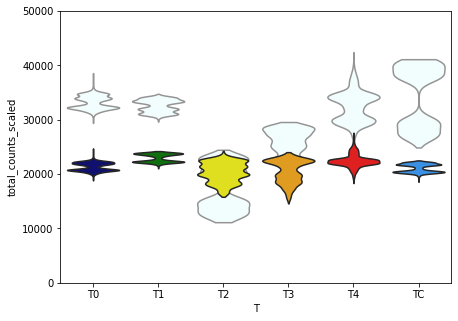

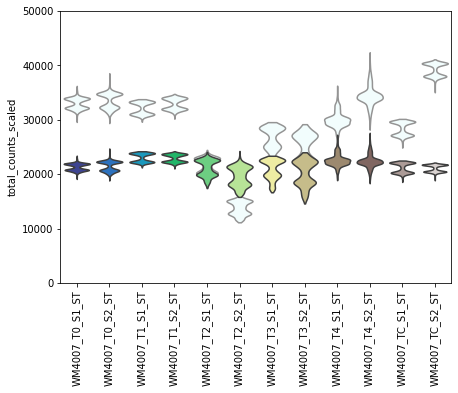

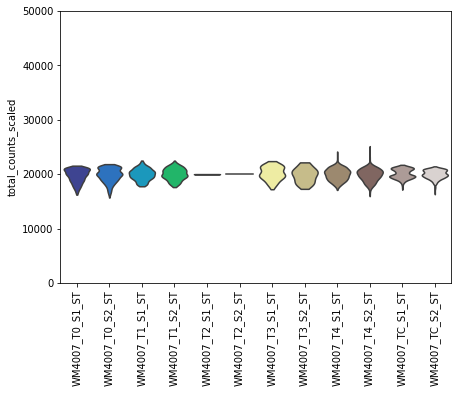

In [6]:
initialLibrarySizes = scaleMH(ads, ids, palette=palette1)
initialLibrarySizes

# Concatenate all RNA data objects

In [7]:
ad_all = concatADs(ads, ids)

(18110, 34249)


# Correlation of counts across samples

### Correlation across technical replicates

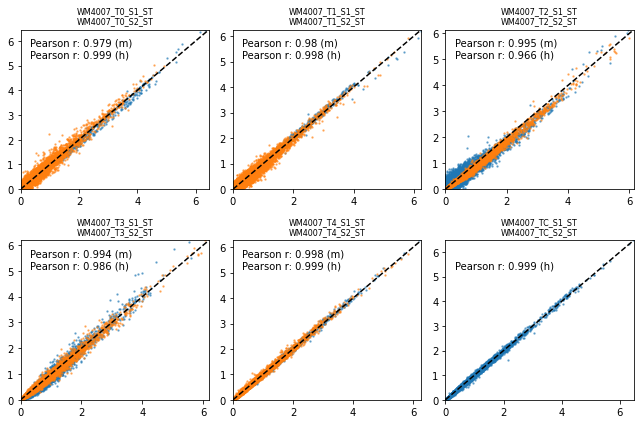

In [8]:
ni, nj = 2, 3
fig, axs = plt.subplots(ni, nj, figsize=(nj*3, ni*3))

simpleCorrPlot(ids[0], ids[1], axs[0, 0], ad_all)
simpleCorrPlot(ids[2], ids[3], axs[0, 1], ad_all)
simpleCorrPlot(ids[4], ids[5], axs[0, 2], ad_all)

simpleCorrPlot(ids[6], ids[7], axs[1, 0], ad_all)
simpleCorrPlot(ids[8], ids[9], axs[1, 1], ad_all)
simpleCorrPlot(ids[10], ids[11], axs[1, 2], ad_all)

fig.tight_layout()

### Correlation across biological replicates 

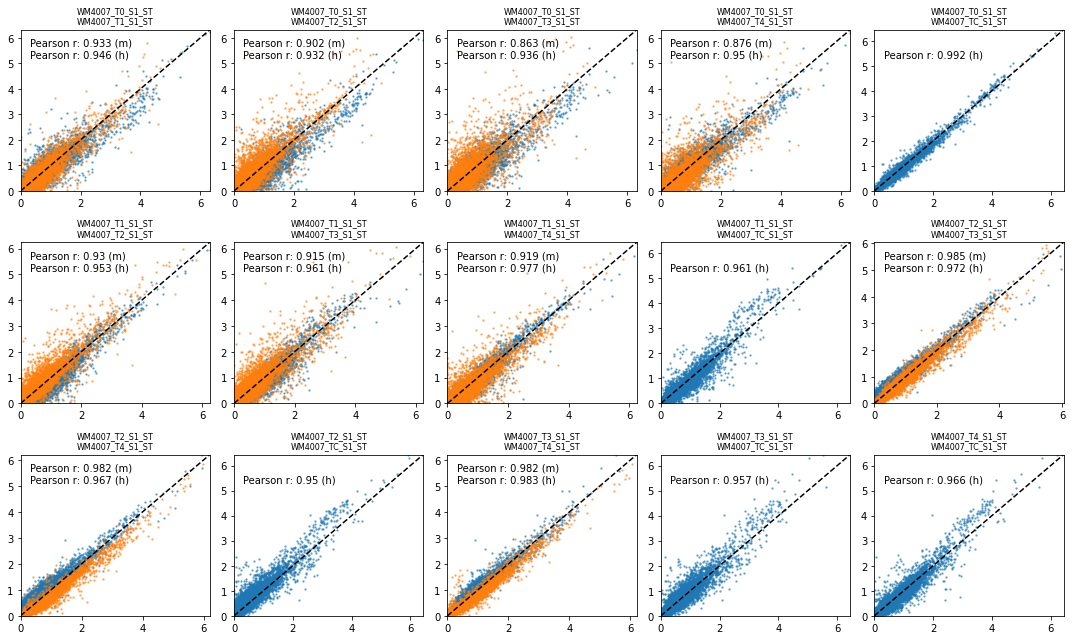

In [9]:
ni, nj = 3, 5
fig, axs = plt.subplots(ni, nj, figsize=(nj*3, ni*3))

simpleCorrPlot(ids[0], ids[2], axs[0, 0], ad_all)
simpleCorrPlot(ids[0], ids[4], axs[0, 1], ad_all)
simpleCorrPlot(ids[0], ids[6], axs[0, 2], ad_all)
simpleCorrPlot(ids[0], ids[8], axs[0, 3], ad_all)
simpleCorrPlot(ids[0], ids[10],axs[0, 4], ad_all)

simpleCorrPlot(ids[2], ids[4], axs[1, 0], ad_all)
simpleCorrPlot(ids[2], ids[6], axs[1, 1], ad_all)
simpleCorrPlot(ids[2], ids[8], axs[1, 2], ad_all)
simpleCorrPlot(ids[2], ids[10],axs[1, 3], ad_all)

simpleCorrPlot(ids[4], ids[6], axs[1, 4], ad_all)

simpleCorrPlot(ids[4], ids[8], axs[2, 0], ad_all)
simpleCorrPlot(ids[4], ids[10],axs[2, 1], ad_all)

simpleCorrPlot(ids[6], ids[8], axs[2, 2], ad_all)
simpleCorrPlot(ids[6], ids[10],axs[2, 3], ad_all)

simpleCorrPlot(ids[8], ids[10],axs[2, 4], ad_all)

fig.tight_layout()

# Save data object

In [10]:
ad_all.write(dataPath + 'ad_all_scaled_unfiltered_st_%s.h5ad' % model)

C:\Users\domans\Anaconda3\lib\site-packages\anndata\_core\anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'clusters' as categorical
C:\Users\domans\Anaconda3\lib\site-packages\anndata\_core\anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'clusters_consensus' as categorical
C:\Users\domans\Anaconda3\lib\site-packages\anndata\_core\anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will